# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather'

params = {
    "q": " ",
    "appid": weather_api_key
}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    params["q"]= city

    # Create endpoint URL with each city
    city_url = requests.get(url, params=params)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | verkhnyaya toyma
Processing Record 2 of Set 1 | port hawkesbury
Processing Record 3 of Set 1 | muros
Processing Record 4 of Set 1 | taolanaro
'coord'
City not found. Skipping...
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | bonfim
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | okha
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | vila
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | kyra
Processing Record 15 of Set 1 | eskasem
'coord'
City not found. Skipping...
Processing Record 16 of Set 1 | illoqqortoormiut
'coord'
City not found. Skipping...
Processing Record 17 of Set 1 | paamiut
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | la ronge
Processing Record 20 of Set 1 | vaini
Processing Record 21 

Processing Record 32 of Set 4 | antofagasta
Processing Record 33 of Set 4 | salinas
Processing Record 34 of Set 4 | moanda
Processing Record 35 of Set 4 | san cristobal
Processing Record 36 of Set 4 | chokurdakh
Processing Record 37 of Set 4 | karaul
'coord'
City not found. Skipping...
Processing Record 38 of Set 4 | lompoc
Processing Record 39 of Set 4 | bedford
Processing Record 40 of Set 4 | lorengau
Processing Record 41 of Set 4 | grand gaube
Processing Record 42 of Set 4 | salalah
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | monaco-ville
Processing Record 45 of Set 4 | zhigansk
Processing Record 46 of Set 4 | severo-yeniseyskiy
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | fukue
Processing Record 49 of Set 4 | inhambane
Processing Record 0 of Set 5 | padang
Processing Record 1 of Set 5 | byron bay
Processing Record 2 of Set 5 | codrington
Processing Record 3 of Set 5 | uarini
Processing Record 4 of Set 5 | sao felix do xin

Processing Record 18 of Set 8 | kunming
Processing Record 19 of Set 8 | lata
Processing Record 20 of Set 8 | strezhevoy
Processing Record 21 of Set 8 | placido de castro
Processing Record 22 of Set 8 | egvekinot
Processing Record 23 of Set 8 | faya
Processing Record 24 of Set 8 | waipawa
Processing Record 25 of Set 8 | polunochnoye
Processing Record 26 of Set 8 | korla
Processing Record 27 of Set 8 | plouzane
Processing Record 28 of Set 8 | halalo
'coord'
City not found. Skipping...
Processing Record 29 of Set 8 | yelizovo
Processing Record 30 of Set 8 | vilyuysk
Processing Record 31 of Set 8 | bundaberg
Processing Record 32 of Set 8 | asfi
Processing Record 33 of Set 8 | wanning
Processing Record 34 of Set 8 | vibo valentia
Processing Record 35 of Set 8 | puerto ayacucho
Processing Record 36 of Set 8 | gualaquiza
Processing Record 37 of Set 8 | saint-francois
Processing Record 38 of Set 8 | araouane
Processing Record 39 of Set 8 | campbeltown
Processing Record 40 of Set 8 | khushab
Pr

Processing Record 4 of Set 12 | college
Processing Record 5 of Set 12 | satitoa
'coord'
City not found. Skipping...
Processing Record 6 of Set 12 | xiongzhou
Processing Record 7 of Set 12 | kracheh
'coord'
City not found. Skipping...
Processing Record 8 of Set 12 | whitianga
Processing Record 9 of Set 12 | izumo
Processing Record 10 of Set 12 | bambanglipuro
Processing Record 11 of Set 12 | ko samui
Processing Record 12 of Set 12 | hobyo
Processing Record 13 of Set 12 | phrai bung
'coord'
City not found. Skipping...
Processing Record 14 of Set 12 | fort nelson
Processing Record 15 of Set 12 | gunnedah
Processing Record 16 of Set 12 | santa isabel
Processing Record 17 of Set 12 | that phanom
Processing Record 18 of Set 12 | tsienyane
'coord'
City not found. Skipping...
Processing Record 19 of Set 12 | vitimskiy
'coord'
City not found. Skipping...
Processing Record 20 of Set 12 | cochrane
Processing Record 21 of Set 12 | mitu
Processing Record 22 of Set 12 | koundara
Processing Record 23

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,verkhnyaya toyma,62.2349,44.9985,274.37,97,100,3.88,RU,1679339337
1,port hawkesbury,45.6169,-61.3485,276.43,51,1,7.15,CA,1679339338
2,muros,42.7762,-9.0603,287.09,77,100,3.23,ES,1679339112
3,tiksi,71.6872,128.8694,240.96,98,89,4.66,RU,1679339340
4,carnarvon,-24.8667,113.6333,296.32,80,8,7.63,AU,1679339095


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,verkhnyaya toyma,62.2349,44.9985,274.37,97,100,3.88,RU,1679339337
1,port hawkesbury,45.6169,-61.3485,276.43,51,1,7.15,CA,1679339338
2,muros,42.7762,-9.0603,287.09,77,100,3.23,ES,1679339112
3,tiksi,71.6872,128.8694,240.96,98,89,4.66,RU,1679339340
4,carnarvon,-24.8667,113.6333,296.32,80,8,7.63,AU,1679339095


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

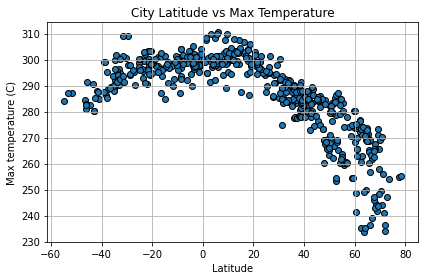

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x= city_data_df["Lat"], y=city_data_df["Max Temp"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (C)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

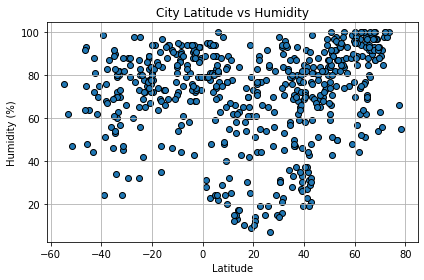

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x= city_data_df["Lat"], y=city_data_df["Humidity"], edgecolors = "black")


# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

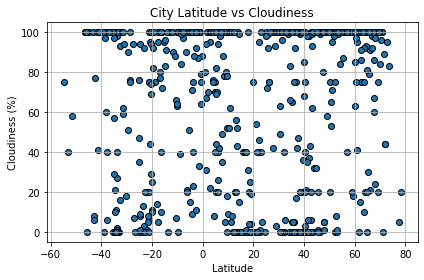

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x= city_data_df["Lat"], y=city_data_df["Cloudiness"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

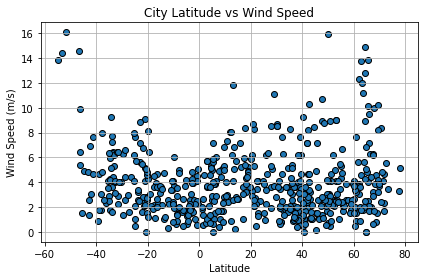

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x= city_data_df["Lat"], y=city_data_df["Wind Speed"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def lingress_function(x,y, xlabel, ylabel):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
    regress_values = x * slope + intercept
    plt.plot(x, regress_values, "r-")
    print(f"The r-value is : {rvalue}")
    plt.show()


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,verkhnyaya toyma,62.2349,44.9985,274.37,97,100,3.88,RU,1679339337
1,port hawkesbury,45.6169,-61.3485,276.43,51,1,7.15,CA,1679339338
2,muros,42.7762,-9.0603,287.09,77,100,3.23,ES,1679339112
3,tiksi,71.6872,128.8694,240.96,98,89,4.66,RU,1679339340
5,bonfim,3.0833,-59.9500,309.93,23,22,3.58,BR,1679339341


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,carnarvon,-24.8667,113.6333,296.32,80,8,7.63,AU,1679339095
6,cape town,-33.9258,18.4232,291.55,79,40,7.72,ZA,1679339100
8,ushuaia,-54.8000,-68.3000,283.94,76,75,13.89,AR,1679339343
10,rikitea,-23.1203,-134.9692,299.47,78,3,5.66,PF,1679339345
16,vaini,-21.2000,-175.2000,298.24,88,75,4.12,TO,1679339073


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.8747924727539343


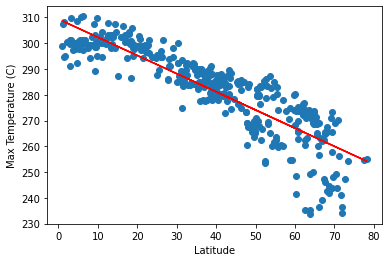

In [49]:
# Linear regression on Northern Hemisphere
lingress_function(x = northern_hemi_df["Lat"], y = northern_hemi_df["Max Temp"], xlabel = "Latitude", ylabel = "Max Temperature (C)")

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE